In [2]:
#import the pandas library and create and load in the data frame
import pandas as pd
df = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Refined_Data_Set.csv')

In [3]:
#import other libraries for analysis
#Import Libraries
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Overview of the data:

In [4]:
df

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3 days 11:48:00,83.800000


In [5]:
#number of unique values over the columns
df.nunique(axis=0)

subject_id                                              141057
hadm_id                                                 292422
anchor_age                                                  73
drg_severity                                                 4
drg_mortality                                                4
                                                         ...  
admit-edout_categories_quartiles_q3                          2
admit-edout_categories_quartiles_q4                          2
admit-edout_categories_quartiles_spent_no_time_in_ED         2
length_of_stay                                           33714
length_of_stay_hours                                     33714
Length: 71, dtype: int64

In [6]:
#discribe the data frame (count, mean, standard deviation, min, max) - to better understand the data
#there are n columns bc this doesn't evaluate datetime 
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay_hours
count,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,...,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000,292422.000000
mean,15008963.415725,25001761.964558,58.581817,2.367879,1.995455,0.470618,0.014041,0.002753,0.013104,0.001094,...,0.010618,0.032990,0.000605,0.016103,0.343199,0.167022,0.165453,0.158777,0.343199,138.111476
std,2881465.696808,2889055.954396,18.750495,0.930463,1.003898,0.499137,0.117662,0.052396,0.113722,0.033062,...,0.102496,0.178611,0.024595,0.125874,0.474778,0.372996,0.371589,0.365469,0.474778,172.743620
min,10000032.000000,20000019.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.683333
25%,12506247.000000,22501022.250000,45.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.483333
50%,15009765.000000,25004704.000000,60.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.683333
75%,17509107.000000,27506992.250000,73.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,160.166667
max,19999987.000000,29999828.000000,91.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7103.716667


In [7]:
#Understanding the data:
#**Those that had a negative LOS**
#Organ donor accounts are sometimes created for patients who died in the hospital. These are distinct hospital admissions with very short, sometimes negative lengths of stay. Furthermore, their deathtime is frequently the same as the earlier patient admission’s deathtime.

In [8]:
df.loc[df['length_of_stay_hours'] < 0]

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
1417,10049642,26714941,70,4.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-1 days +23:15:00,-0.750000
8248,10294074,23396294,83,3.0,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,-1 days +23:11:00,-0.816667
14821,10531790,28680274,83,2.0,3.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,-1 days +21:16:00,-2.733333
15478,10554954,25052996,51,2.0,3.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,-1 days +12:58:00,-11.033333
15727,10564068,22025371,86,3.0,3.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,-1 days +19:01:00,-4.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273563,19357413,25477997,79,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-1 days +19:37:00,-4.383333
281838,19638958,22808887,48,3.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1 days +09:36:00,-14.400000
288993,19887023,24942188,91,4.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,-1 days +14:06:00,-9.900000
289519,19904685,24196469,49,3.0,4.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,-1 days +09:11:00,-14.816667


In [9]:
df.loc[df['length_of_stay_hours'] == 0]

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours


In [10]:
#determine the number of null numbers in the columns
number_of_null = df.isnull().sum()
for column, count in number_of_null.items():
    print(f"Column '{column}' has {count} null values.")

Column 'subject_id' has 0 null values.
Column 'hadm_id' has 0 null values.
Column 'anchor_age' has 0 null values.
Column 'drg_severity' has 0 null values.
Column 'drg_mortality' has 0 null values.
Column 'gender_M' has 0 null values.
Column 'race_ASIAN' has 0 null values.
Column 'race_ASIAN - ASIAN INDIAN' has 0 null values.
Column 'race_ASIAN - CHINESE' has 0 null values.
Column 'race_ASIAN - KOREAN' has 0 null values.
Column 'race_ASIAN - SOUTH EAST ASIAN' has 0 null values.
Column 'race_BLACK/AFRICAN' has 0 null values.
Column 'race_BLACK/AFRICAN AMERICAN' has 0 null values.
Column 'race_BLACK/CAPE VERDEAN' has 0 null values.
Column 'race_BLACK/CARIBBEAN ISLAND' has 0 null values.
Column 'race_HISPANIC OR LATINO' has 0 null values.
Column 'race_HISPANIC/LATINO - CENTRAL AMERICAN' has 0 null values.
Column 'race_HISPANIC/LATINO - COLUMBIAN' has 0 null values.
Column 'race_HISPANIC/LATINO - CUBAN' has 0 null values.
Column 'race_HISPANIC/LATINO - DOMINICAN' has 0 null values.
Column '

Adressing outliers:

<Axes: >

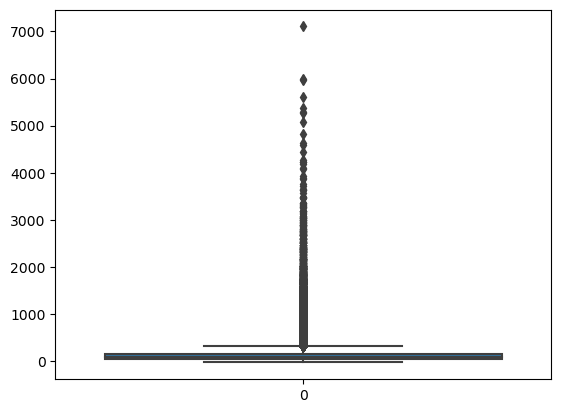

In [11]:
#LOS outliers
sns.boxplot(df['length_of_stay_hours'])

<Axes: xlabel='length_of_stay_hours', ylabel='Count'>

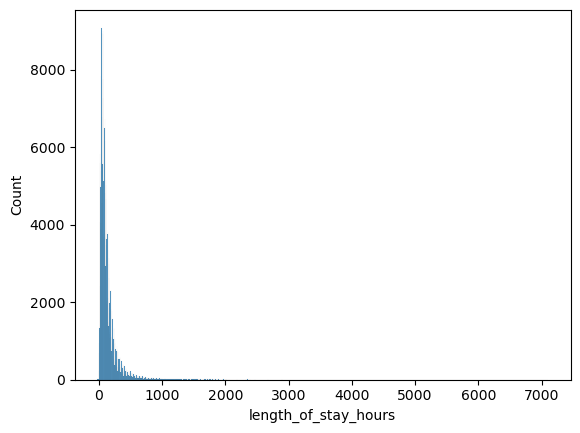

In [12]:
sns.histplot(data=df, x=df['length_of_stay_hours'])

In [13]:
#z-score with trimming(don't want to create false data - therefore trimming)
upper_limit = df['length_of_stay_hours'].mean() + (3*df['length_of_stay_hours'].std())
lower_limit = df['length_of_stay_hours'].mean() - (3*df['length_of_stay_hours'].std())
print('This is the upper limit (z-score of 3):', upper_limit)
print('This is the lower limit (z-score of 3):', lower_limit)

This is the upper limit (z-score of 3): 656.3423349221488
This is the lower limit (z-score of 3): -380.11938316065346


In [14]:
#remove the outliers (trimming)
df.loc[(df['length_of_stay_hours']>upper_limit)|(df['length_of_stay_hours']<0)]

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
248,10007818,22987108,69,4.0,4.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,31 days 07:23:00,751.383333
338,10011427,22216667,69,4.0,4.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,31 days 21:01:00,765.016667
377,10013310,22098926,70,4.0,4.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,41 days 06:05:00,990.083333
390,10013569,27993048,54,4.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,36 days 06:30:00,870.500000
523,10017531,21095812,63,4.0,4.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,39 days 19:46:00,955.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292221,19993214,23787697,37,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,37 days 20:16:00,908.266667
292223,19993214,29361930,37,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,49 days 13:26:00,1189.433333
292325,19997367,20617667,63,4.0,4.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,29 days 07:00:00,703.000000
292341,19997886,20793010,67,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,28 days 13:25:00,685.416667


In [15]:
#less than 2 percent removed as outliers from the data
print(5389/292422)

0.018428845982860386


In [16]:
#stats before removing
df['length_of_stay_hours'].describe()

count    292422.000000
mean        138.111476
std         172.743620
min         -22.683333
25%          52.483333
50%          91.683333
75%         160.166667
max        7103.716667
Name: length_of_stay_hours, dtype: float64

In [17]:
#now remove the outliers
new_df = df.loc[(df['length_of_stay_hours']<=upper_limit) & (df['length_of_stay_hours']>=0)]

In [18]:
#stats after removing
new_df['length_of_stay_hours'].describe()

count    287033.000000
mean        121.631069
std         104.885727
min           0.016667
25%          51.750000
50%          90.416667
75%         152.950000
max         656.333333
Name: length_of_stay_hours, dtype: float64

In [19]:
#number of outliers
print('Number of outliers:',(len(df) - len(new_df)))
print('Number of rows previously:', len(df))
print('Number of rows currently:', len(new_df))



Number of outliers: 5389
Number of rows previously: 292422
Number of rows currently: 287033


<Axes: >

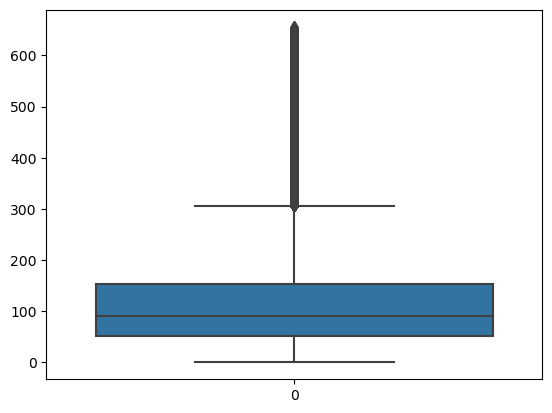

In [20]:
sns.boxplot(new_df['length_of_stay_hours'])

<Axes: xlabel='length_of_stay_hours', ylabel='Count'>

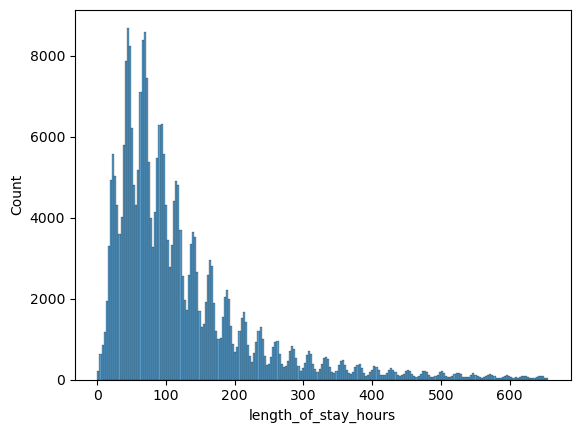

In [21]:
#plot the histogram
sns.histplot(data=new_df, x=new_df['length_of_stay_hours'])

/var/folders/p1/tsx86yk52sd6stph8w5tv_800000gn/T/ipykernel_83907/784642135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['length_of_stay_hours'])


<Axes: xlabel='length_of_stay_hours', ylabel='Density'>

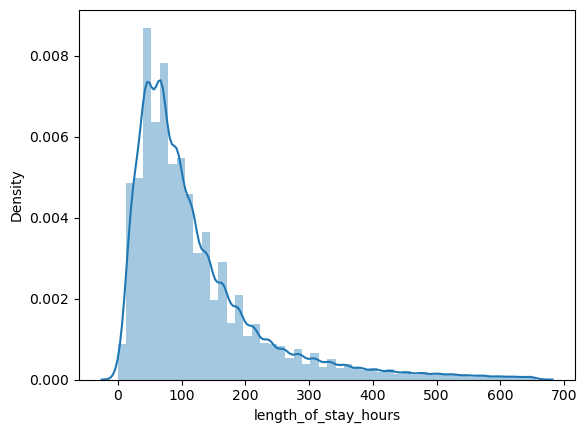

In [22]:
#plot simular 
sns.distplot(new_df['length_of_stay_hours'])

Export the datasets:

In [23]:
#create the df data set without removing the outliers, just timming all the times < 0
#also removing the null values with 'time_in_emergency_dpt_hours'
df_with_outliers = df.loc[(df['length_of_stay_hours']>0)]
df_with_outliers.to_csv('/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Data_Set_WITH_Outliers.csv', index = False)

In [24]:
#now export the data set with the outliers
new_df.to_csv('/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Data_Set_WOUT_Outliers.csv', index = False)

In [25]:
df_with_outliers

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3 days 11:48:00,83.800000


In [26]:
new_df

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3 days 11:48:00,83.800000


In [27]:
df

,subject_id,hadm_id,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,...,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED,length_of_stay,length_of_stay_hours
0,10000032,22595853,52,2.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0 days 18:52:00,18.866667
1,10000032,22841357,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1 days 00:22:00,24.366667
2,10000032,25742920,52,3.0,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1 days 18:06:00,42.100000
3,10000032,29079034,52,3.0,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2 days 05:20:00,53.333333
4,10000084,23052089,72,1.0,1.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,4 days 12:56:00,108.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292417,19999784,29956342,57,2.0,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,5 days 12:44:00,132.733333
292418,19999828,25744818,46,3.0,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10 days 00:16:00,240.266667
292419,19999840,21033226,58,4.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,6 days 23:55:00,167.916667
292420,19999840,26071774,58,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3 days 11:48:00,83.800000
